# Data Description:

1. Title : Diamonds Dataset
2. the 7th column "price" is the values to be predicted.
3. Data Type : Mixed ( Numerical + Categorical)
4. Dataset has nearly 54000 instances.
5. It has 10 features.
6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 




In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [114]:
df= pd.read_csv('/content/drive/MyDrive/data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [115]:
df.shape

(53940, 10)

In [116]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [117]:
df.duplicated().sum()

146

In [118]:
df= df.drop_duplicates()
df.shape

(53794, 10)

In [119]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79778,NaN,NaN,NaN,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,NaN,NaN,NaN,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000


In [120]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [121]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [122]:
# Univariate Analysis
num_feature = df.select_dtypes(include=['int64','float64'])
print(num_feature.columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa877f46210>,
      dtype=object)

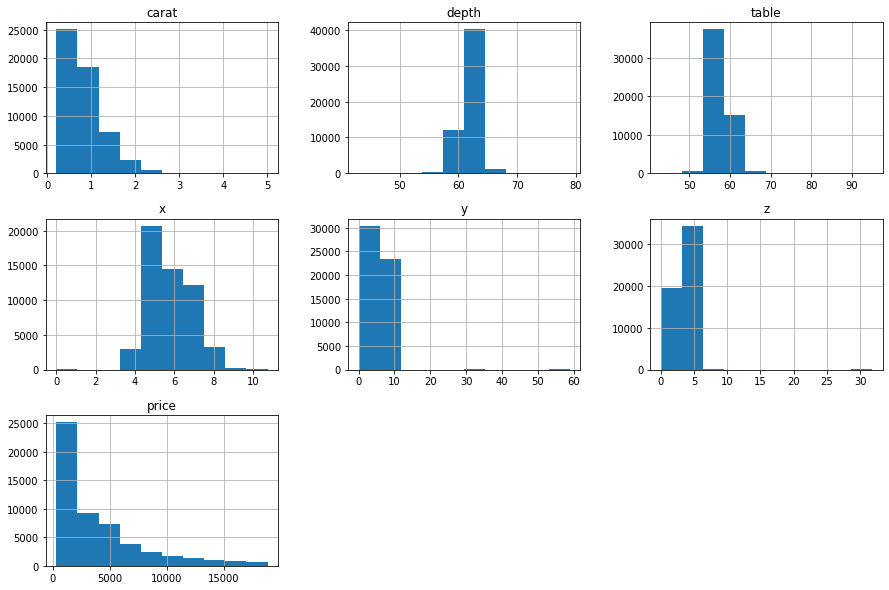

In [123]:
num_feature.hist(figsize=(15,10))

# Observation:
1. The depth is very close to normal distribution.
2. Price feature is right skewed.

In [124]:
cat_feature = df.select_dtypes(include=['object'])
print(cat_feature.columns)


Index(['cut', 'color', 'clarity'], dtype='object')


Text(0.5, 1.0, 'Color vs cut_quality')

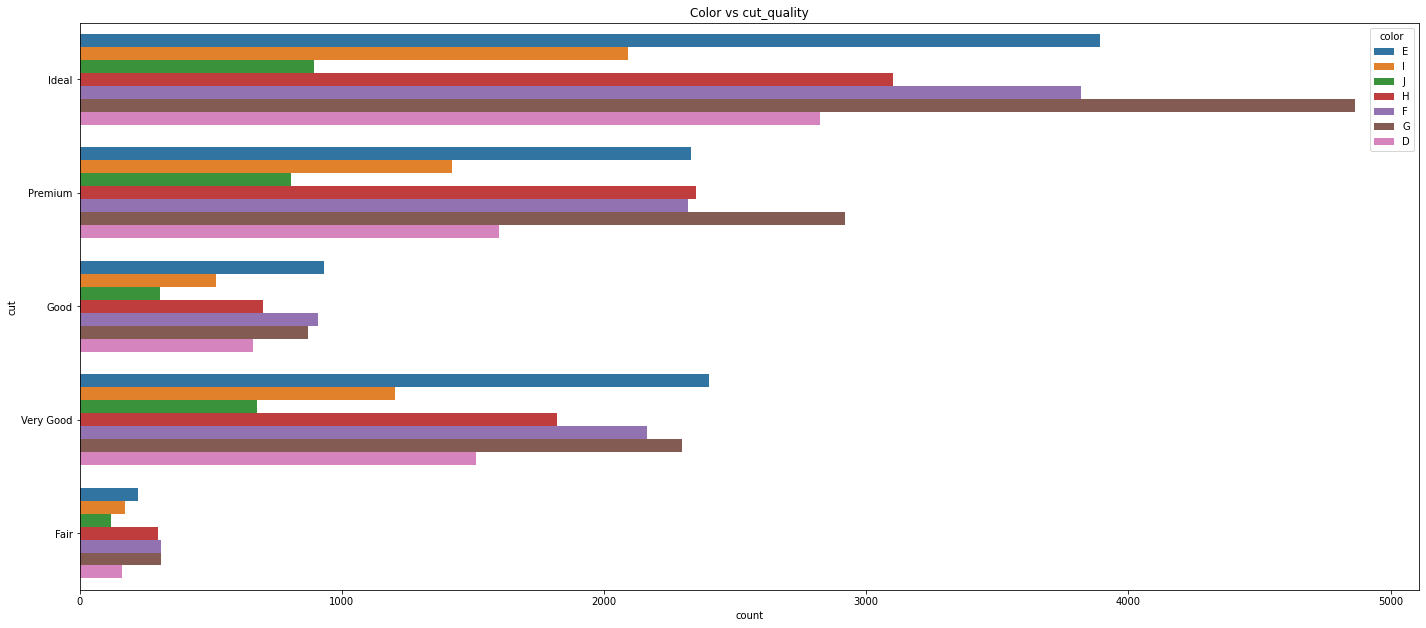

In [125]:
plt.figure(figsize=(24,48))
plt.subplot(411)
sns.countplot(y='cut',hue='color',data=cat_feature)
plt.title('Color vs cut_quality')

# Observation:
Cut quality of any diamond has mostly the best color.

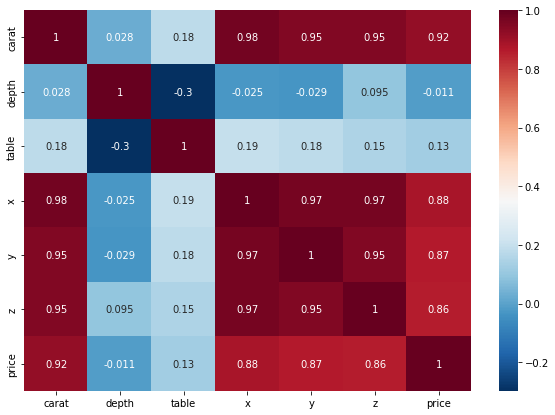

In [126]:
# Bivariate Analysis
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),data=df,annot=True,cmap='RdBu_r')

# Observation:
Price of any diamonds depends upon carat,Length,width,depth

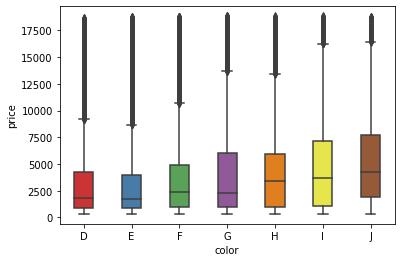

In [127]:
sns.boxplot(y = 'price',data=df,x='color',palette='Set1',width=0.4,order=['D','E','F','G','H','I','J'])

From the above plot we can see that H,G,I,J have less number of outlier than D,E,F

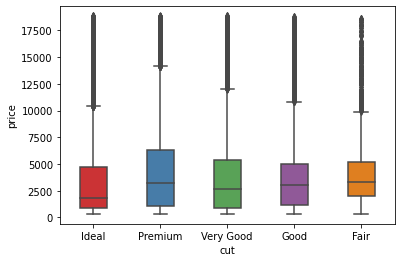

In [128]:
sns.boxplot(y = 'price',data=df,x='cut',palette='Set1',width=0.4,order=['Ideal','Premium','Very Good','Good','Fair'])

From the above plot we can see that fair and ideal have high number of outlier compared to others

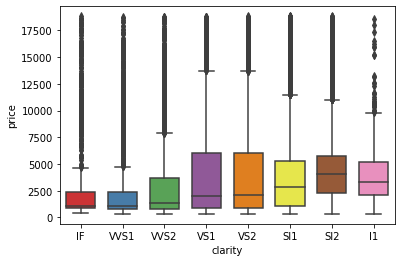

In [129]:
sns.boxplot(y = 'price',data=df,x='clarity',palette='Set1',width=0.7,order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

From the above plot we can see that IF and VVS1 have high number of outlier compared to others.

## Data Preprocessing

In [130]:
num_df = df.select_dtypes(exclude=[np.object])
cat_df = df.select_dtypes(exclude=[np.float64, np.int64])

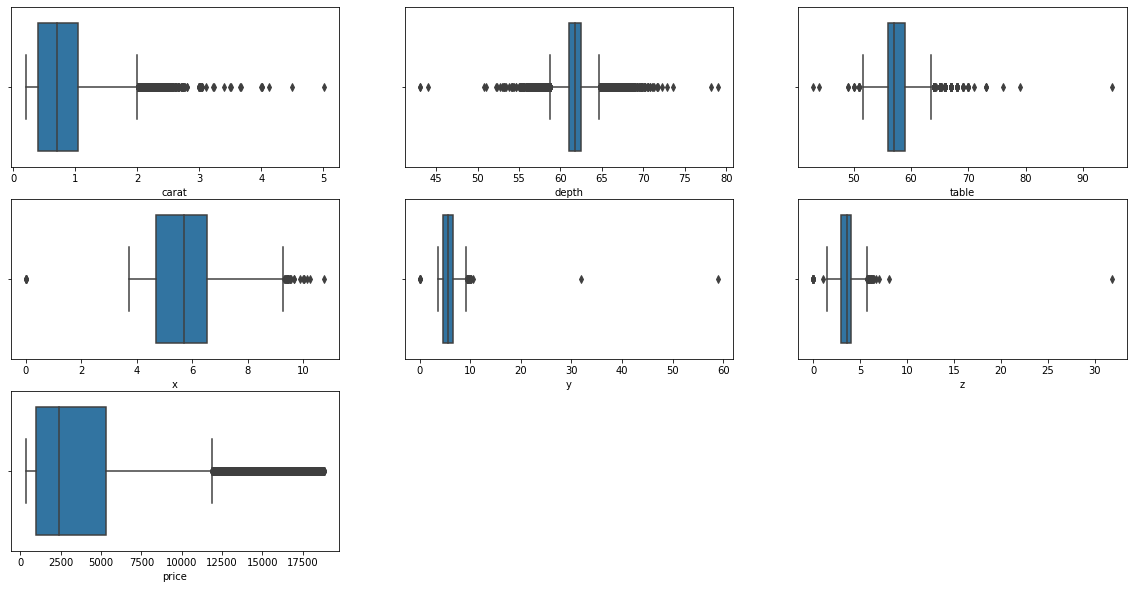

In [131]:
plt.subplots(figsize=(20,10))
count=1
while(count<8):
  for i in num_df.columns:
    plt.subplot(3,3,count)
    sns.boxplot(x=df[i])
    count +=1
plt.show()    

In [132]:
df.shape

(53794, 10)

In [133]:
def remove_outlier_IQR(df, field_name):
    iqr= 1.5*(np.percentile(df[field_name],75)-
              np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(
        iqr + np.percentile(df[field_name],75))].index, inplace=True)
    df.drop(df[df[field_name]< (np.percentile(df[field_name],25)-iqr)].index, inplace=True)
    return df
    

In [134]:
print('Shape of df before IQR:',df.shape)
df2 = remove_outlier_IQR(df, 'carat')
df2 = remove_outlier_IQR(df2, 'depth')
df2 = remove_outlier_IQR(df2, 'table')
df2 = remove_outlier_IQR(df2, 'price')
df2 = remove_outlier_IQR(df2, 'x')
df2 = remove_outlier_IQR(df2, 'y')
df_final = remove_outlier_IQR(df2, 'z')

print('Shape of df after IQR:',df_final.shape)


Shape of df before IQR: (53794, 10)
Shape of df after IQR: (46425, 10)


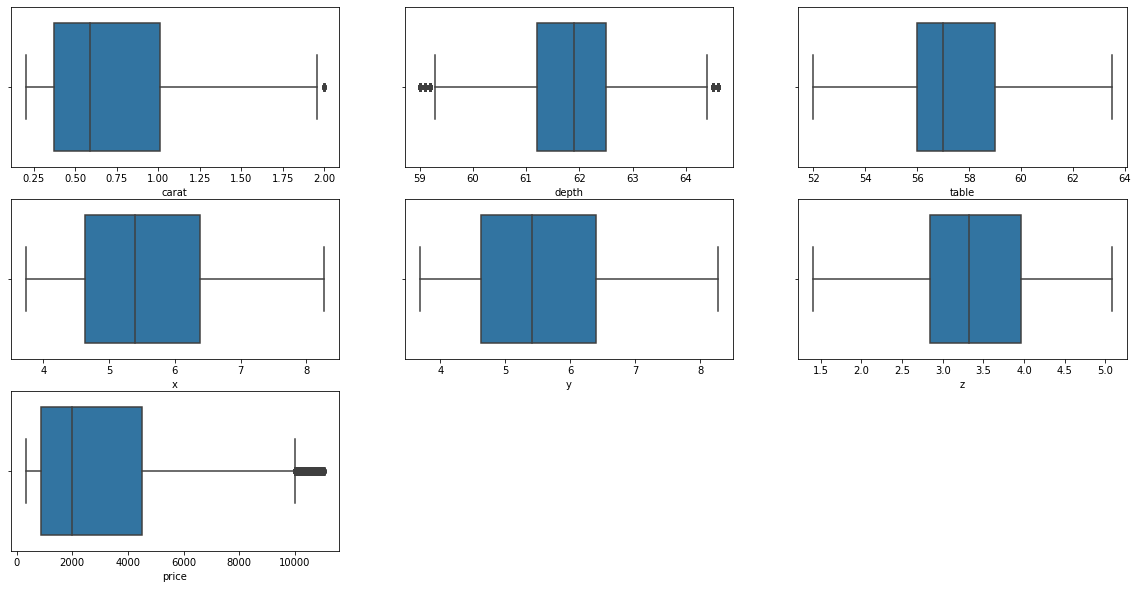

In [135]:
plt.subplots(figsize=(20,10))
count=1
while(count<8):
  for i in num_df.columns:
    plt.subplot(3,3,count)
    sns.boxplot(x=df_final[i])
    count +=1
plt.show()  

In [136]:
# Feature Transformation
df.dtypes[df.dtypes=='object']

cut        object
color      object
clarity    object
dtype: object

In [137]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS2' 'VVS2' 'VVS1' 'VS1' 'I1' 'IF']


In [138]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [139]:
df['cut']= label_encoder.fit_transform(df['cut'])
df['color']= label_encoder.fit_transform(df['color'])
df['clarity']= label_encoder.fit_transform(df['clarity'])
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())



[2 3 1 4 0]
[1 5 6 4 2 3 0]
[3 2 5 7 6 4 0 1]


## Data Splitting for Train and Test

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X= df.drop(columns=['price'])
y= df['price']
#Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(scaled_df,y,test_size=0.25)
print('X train shape: {} and y train shape: {}'.format(X_train.shape,y_train.shape))
print('X test shape: {} and y test shape: {}'.format(X_test.shape,y_test.shape))


X train shape: (34818, 9) and y train shape: (34818,)
X test shape: (11607, 9) and y test shape: (11607,)


# Model Training and evaluation

In [141]:
train  = np.array(X_train)
y_train = np.array(y_train)
#reshaping array from columns to rows
y_train = y_train.reshape(-1,1)
#converting into matrix
train_df = np.hstack([train, y_train])                   
train_df[0:2]                  

array([[-5.20016088e-01, -6.61792692e-01, -9.11144578e-01,
         6.43638578e-01, -8.38563181e-01, -6.15691568e-01,
        -3.34032091e-01, -3.93518750e-01, -4.42643843e-01,
         1.78100000e+03],
       [-1.04495439e+00,  1.45862042e+00,  2.75704289e-01,
        -1.66912620e+00, -3.40798089e-03, -1.11222996e+00,
        -1.17402606e+00, -1.12383778e+00, -1.14602354e+00,
         9.54000000e+02]])

In [142]:
test= np.array(X_test)
test[0]

array([ 0.28120554, -0.66179269,  0.27570429, -0.51274381,  0.36777211,
       -0.11915317,  0.42299951,  0.4515647 ,  0.47844862])

In [143]:
preds = []
for i in range(len(test)):
    distances = np.sqrt(np.sum((train-test[i])**2,axis=1))
    distances = distances.reshape(-1,1)
    matrix = np.hstack([train_df,distances])
    sorted_matrix = matrix[matrix[:,-1].argsort()]
    neighbours = [sorted_matrix[i][-2] for i in range(5)] 
    pred_value = np.mean(neighbours)
    preds.append(pred_value)
knn_scratch_pred = np.array(preds)
knn_scratch_pred

array([2688.8, 1162.4, 5593.4, ...,  631.2,  677.2, 2023.4])

In [144]:
## Using Sklearn
# to find optimal k value
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

rmse_value = []
for K in range(10):
    K= K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_value.append(error)
    print('RMSE value for k = ',K, 'is:',error)



RMSE value for k =  1 is: 589.3528236581678
RMSE value for k =  2 is: 525.0732568778462
RMSE value for k =  3 is: 515.3824891061514
RMSE value for k =  4 is: 499.49292954492796
RMSE value for k =  5 is: 494.1796869751608
RMSE value for k =  6 is: 496.4944929747303
RMSE value for k =  7 is: 501.6121014469945
RMSE value for k =  8 is: 504.8002038750147
RMSE value for k =  9 is: 506.23274281328656
RMSE value for k =  10 is: 509.748531998772


In [145]:
# Using optimal k value
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)
pred= model.predict(X_test)
pred

array([[2688.8],
       [1162.4],
       [5593.4],
       ...,
       [ 631.2],
       [ 677.2],
       [2023.4]])

## Comparing Sklearn and KNN from Scratch

In [146]:
print('Predicted values using sklearn:',pred)
print('Predicted values using knn_from_scratch:',knn_scratch_pred)


Predicted values using sklearn: [[2688.8]
 [1162.4]
 [5593.4]
 ...
 [ 631.2]
 [ 677.2]
 [2023.4]]
Predicted values using knn_from_scratch: [2688.8 1162.4 5593.4 ...  631.2  677.2 2023.4]


In [147]:
sklearn_pred = pred.reshape(-1,1)
knn_pred = knn_scratch_pred.reshape(-1,1)
predicted_values = np.hstack([sklearn_pred,knn_pred])
pred_df = pd.DataFrame(predicted_values,columns=['sklearn_preds','knn_preds'])
pred_df

,sklearn_preds,knn_preds
0,2688.8,2688.8
1,1162.4,1162.4
2,5593.4,5593.4
3,2650.4,2650.4
4,5253.6,5253.6
...,...,...
11602,838.8,838.8
11603,5934.2,5934.2
11604,631.2,631.2
11605,677.2,677.2


Conclusion: WE are getting similar output with or without using sklearn.